# Data cleaning
W tym pliku przygotuję zbiór danych do dalszej pracy.

## Import potrzebnych bibliotek.

In [235]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Wczytanie danych z plików CSV.

In [236]:
# główne dane
postings = pd.read_csv('postings.csv')

In [237]:
# dodatkowe informacje
job_industries = pd.read_csv('job_industries.csv')
industries = pd.read_csv('industries.csv')
job_skills = pd.read_csv('job_skills.csv')
skills = pd.read_csv('skills.csv')
employee_counts = pd.read_csv('employee_counts.csv')

## Sprawdzenie podstawowych informacji o danych:
### * postings.csv (struktura, ile jest braków w każdej kolumnie)

In [238]:
postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29793 non-null   float64
 5   pay_period                  36073 non-null   object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   views                       122160 non-null  float64
 9   med_salary                  6280 non-null    float64
 10  min_salary                  29793 non-null   float64
 11  formatted_work_type         123849 non-null  object 
 12  applies                     23320 non-null   float64
 13  original_liste

In [239]:
postings.head(5)

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [240]:
missing_percent = (postings.isna().sum() / len(postings)) * 100
missing_percent.sort_values(ascending=False)

closed_time                   99.133622
skills_desc                   98.030666
med_salary                    94.929309
remote_allowed                87.689848
applies                       81.170619
max_salary                    75.944093
min_salary                    75.944093
currency                      70.873402
compensation_type             70.873402
normalized_salary             70.873402
pay_period                    70.873402
posting_domain                32.271556
application_url               29.604599
formatted_experience_level    23.745852
fips                          22.135827
zip_code                      16.852780
company_name                   1.387981
company_id                     1.386366
views                          1.363757
description                    0.005652
work_type                      0.000000
sponsored                      0.000000
job_id                         0.000000
listed_time                    0.000000
expiry                         0.000000


In [241]:
missing_percent[missing_percent > 0]

company_name                   1.387981
description                    0.005652
max_salary                    75.944093
pay_period                    70.873402
company_id                     1.386366
views                          1.363757
med_salary                    94.929309
min_salary                    75.944093
applies                       81.170619
remote_allowed                87.689848
application_url               29.604599
closed_time                   99.133622
formatted_experience_level    23.745852
skills_desc                   98.030666
posting_domain                32.271556
currency                      70.873402
compensation_type             70.873402
normalized_salary             70.873402
zip_code                      16.852780
fips                          22.135827
dtype: float64

In [242]:
postings.describe()

,job_id,max_salary,company_id,views,med_salary,min_salary,applies,original_listed_time,remote_allowed,expiry,closed_time,listed_time,sponsored,normalized_salary,zip_code,fips
count,1.238490e+05,2.979300e+04,1.221320e+05,122160.000000,6280.000000,2.979300e+04,23320.000000,1.238490e+05,15246.0,1.238490e+05,1.073000e+03,1.238490e+05,123849.0,3.607300e+04,102977.000000,96434.000000
mean,3.896402e+09,9.193942e+04,1.220401e+07,14.618247,22015.619876,6.491085e+04,10.591981,1.713152e+12,1.0,1.716213e+12,1.712928e+12,1.713204e+12,0.0,2.053270e+05,50400.491887,28713.879887
std,8.404355e+07,7.011101e+05,2.554143e+07,85.903598,52255.873846,4.959738e+05,29.047395,4.848209e+08,0.0,2.321394e+09,3.622893e+08,3.989122e+08,0.0,5.097627e+06,30252.232515,16015.929825
min,9.217160e+05,1.000000e+00,1.009000e+03,1.000000,0.000000,1.000000e+00,1.000000,1.701811e+12,1.0,1.712903e+12,1.712346e+12,1.711317e+12,0.0,0.000000e+00,1001.000000,1003.000000
25%,3.894587e+09,4.828000e+01,1.435200e+04,3.000000,18.940000,3.700000e+01,1.000000,1.712863e+12,1.0,1.715481e+12,1.712670e+12,1.712886e+12,0.0,5.200000e+04,24112.000000,13121.000000
50%,3.901998e+09,8.000000e+04,2.269650e+05,4.000000,25.500000,6.000000e+04,3.000000,1.713395e+12,1.0,1.716042e+12,1.712670e+12,1.713408e+12,0.0,8.150000e+04,48059.000000,29183.000000
75%,3.904707e+09,1.400000e+05,8.047188e+06,8.000000,2510.500000,1.000000e+05,8.000000,1.713478e+12,1.0,1.716088e+12,1.713283e+12,1.713484e+12,0.0,1.250000e+05,78201.000000,42077.000000
max,3.906267e+09,1.200000e+08,1.034730e+08,9975.000000,750000.000000,8.500000e+07,967.000000,1.713573e+12,1.0,1.729125e+12,1.713562e+12,1.713573e+12,0.0,5.356000e+08,99901.000000,56045.000000


In [243]:
postings.describe(include='object')

,company_name,title,description,pay_period,location,formatted_work_type,job_posting_url,application_url,application_type,formatted_experience_level,skills_desc,posting_domain,work_type,currency,compensation_type
count,122130,123849,123842,36073,123849,123849,123849,87184,123849,94440,2439,83881,123849,36073,36073
unique,24428,72521,107827,5,8526,7,123849,84800,4,6,2212,4443,7,6,1
top,Liberty Healthcare and Rehabilitation Services,Sales Manager,Position Summary: Our Sales Manager has managi...,YEARLY,United States,Full-time,https://www.linkedin.com/jobs/view/921716/?trk...,https://app.dataannotation.tech/worker_signup?...,OffsiteApply,Mid-Senior level,This position requires the following skills: E...,www.click2apply.net,FULL_TIME,USD,BASE_SALARY
freq,1108,673,474,20628,8125,98814,1,205,84607,41489,28,3811,98814,36058,36073


### Usunięcie wierszy z brakami w kluczowych kolumnach (normalized_salary, pay_period, currency, compensation_type)

In [244]:
salary_essential = ['normalized_salary', 'currency', 'pay_period', 'compensation_type']
postings_cleaned = postings.dropna(subset=salary_essential)

Jakie wartości zawiera pay_period?

In [245]:
print(postings_cleaned['pay_period'].value_counts())

pay_period
YEARLY      20628
HOURLY      14741
MONTHLY       518
WEEKLY        177
BIWEEKLY        9
Name: count, dtype: int64


### Czyszczenie pozostałych kolumn

Usunięcie niepotrzebnych kolumn i kolumn z dużymi brakami (ponad 70%)

In [247]:
cols_to_drop = [
    'closed_time', 'skills_desc', 'med_salary', 'max_salary', 'min_salary',
    'applies', 'views', 'application_url', 'posting_domain',
    'fips', 'zip_code', 'job_posting_url', 'description', 'original_listed_time', 'listed_time', 'expiry', 'sponsored', 'formatted_work_type'
]

In [248]:
postings_cleaned = postings_cleaned.drop(columns=cols_to_drop)

Usunięcie wierszy dla kolumn z minimalnymi brakami - company_name, company_id, work_type, application_type, formatted_experience_level:

In [250]:
essential_low_nulls = ['company_name', 'company_id', 'work_type', 'application_type', 'formatted_experience_level']
postings_cleaned = postings_cleaned.dropna(subset=essential_low_nulls)

Jakie wartości zawiera remote_allowed?

In [251]:
print(postings_cleaned['remote_allowed'].value_counts())

remote_allowed
1.0    3664
Name: count, dtype: int64


remote_allowed zawiera wartości 1.0 lub NaN. Wobec tego 1.0 potraktujemy jako 'yes', a NaN jako 'no', w tym celu utworzona zostanie zmienna binarna:

In [252]:
postings_cleaned['remote_flag'] = postings_cleaned['remote_allowed'].fillna(0).astype(int)

Jakie wartości zaweira currency?

In [253]:
print(postings_cleaned['currency'].value_counts())

currency
USD    27843
EUR        5
CAD        3
BBD        2
GBP        2
Name: count, dtype: int64


Kolumna currency została przeanalizowana pod kątem unikalnych wartości. Spośród wszystkich 35 563 rekordów, aż 99.96% miało wartość USD. Pozostałe 13 rekordów używały walut takich jak EUR, CAD, GBP, BBD. Zdecydowano się usunąć rekordy niebędące w USD i następnie usunąć samą kolumnę jako zbędną – dane są jednolite walutowo.

In [254]:
postings_cleaned = postings_cleaned[postings_cleaned['currency'] == 'USD']
postings_cleaned = postings_cleaned.drop(columns=['currency'])

Jakie wartości zawiera compensation_type?

In [255]:
print(postings_cleaned['compensation_type'].value_counts())

compensation_type
BASE_SALARY    27843
Name: count, dtype: int64


Kolumna compensation_type okazała się jednorodna – wszystkie rekordy zawierały wartość BASE_SALARY. W związku z brakiem zmienności cecha została usunięta jako nieinformacyjna.

In [256]:
postings_cleaned = postings_cleaned.drop(columns=['compensation_type'])

Jakie wartości zawiera kolumna work_type?

In [257]:
print(postings_cleaned['work_type'].value_counts())

work_type
FULL_TIME     22215
CONTRACT       3302
PART_TIME      1689
TEMPORARY       336
INTERNSHIP      182
OTHER           116
VOLUNTEER         3
Name: count, dtype: int64


Zastosowanie OneHotEncoding

In [258]:
postings_cleaned = pd.get_dummies(postings_cleaned, columns=['work_type'], drop_first=True)

Jakie wartości zawiera kolumna formatted_experience_level?

In [259]:
print(postings_cleaned['formatted_experience_level'].value_counts())

formatted_experience_level
Mid-Senior level    12861
Entry level          9107
Associate            3858
Director             1262
Internship            378
Executive             377
Name: count, dtype: int64


Kilka zmian 'kosmetycznych':
* zmiana nazw występujących wartości w formatted_experience_level
* zmiana nazwy kolumny 
* zastosowanie OneHotEncodingu

In [260]:
postings_cleaned['formatted_experience_level'] = postings_cleaned['formatted_experience_level'].replace({
    'Mid-Senior level': 'Mid-Senior',
    'Entry level': 'Entry'
})

In [261]:
postings_cleaned.rename(columns={'formatted_experience_level': 'experience_level'}, inplace=True)

In [262]:
postings_cleaned = pd.get_dummies(postings_cleaned, columns=['experience_level'], drop_first=True)

Wstępne wyświetlenie kilku pierwszych wierszy oraz sprawdzenie ile wartości zawiera zbiór po wstępnym czyszczeniu:

In [263]:
postings_cleaned.head(5)

,job_id,company_name,title,pay_period,location,company_id,remote_allowed,application_type,normalized_salary,remote_flag,...,work_type_INTERNSHIP,work_type_OTHER,work_type_PART_TIME,work_type_TEMPORARY,work_type_VOLUNTEER,experience_level_Director,experience_level_Entry,experience_level_Executive,experience_level_Internship,experience_level_Mid-Senior
85,2558399667,"I.T. Solutions, Inc.","Validation Engineer, Labware LIMS",HOURLY,"Foster City, CA",2610793.0,NaN,ComplexOnsiteApply,135200.0,0,...,False,False,False,False,False,False,False,False,False,True
101,2989631782,ActOne Group,Administrative Assistant - CONCUR,YEARLY,"New York, NY",3496915.0,NaN,ComplexOnsiteApply,82500.0,0,...,False,False,False,False,False,False,False,False,False,False
109,3177010992,ABC Farigua Division,Customer Service Representative,YEARLY,"Greater Orlando, FL",72313277.0,NaN,ComplexOnsiteApply,90000.0,0,...,False,False,False,False,False,False,True,False,False,False
169,3550388220,TECHEAD,Inbound Call Center Specialist,HOURLY,"Richmond, VA",33605.0,NaN,ComplexOnsiteApply,38480.0,0,...,False,False,False,False,False,False,False,False,False,False
194,3614817348,Prolink,Tool and Die Maker,HOURLY,Cincinnati Metropolitan Area,2447993.0,NaN,ComplexOnsiteApply,69680.0,0,...,False,False,False,False,False,False,False,False,False,False


In [264]:
print(f"Liczba ofert po wstepnym czyszczeniu: {len(postings_cleaned)} z {len(postings)}")

Liczba ofert po wstepnym czyszczeniu: 27843 z 123849


### Usunięcie outlinerów metodą IQR w normalized_salary

#### Target - normalized_salary

Najwieksze wartosci normalized_salary:

In [269]:
postings_cleaned[['normalized_salary']].sort_values(by='normalized_salary', ascending=False).head(10)

,normalized_salary
9237,535600000.0
98888,362408800.0
13614,286000000.0
89082,286000000.0
60038,260000000.0
72585,187200000.0
17646,156000000.0
87241,135200000.0
40781,124800000.0
53787,119600000.0


USUWANIE outlierow METODĄ IGR:

In [270]:
# Oblicz wartości kwartylowe
q1 = postings_cleaned['normalized_salary'].quantile(0.25)
q3 = postings_cleaned['normalized_salary'].quantile(0.75)
iqr = q3 - q1

# Górna granica outlierów
upper_bound = q3 + 1.5 * iqr

# Tworzymy wersję danych bez outlierów (IQR)
postings_iqr = postings_cleaned[postings_cleaned['normalized_salary'] <= upper_bound].copy()

print(f"Liczba ogłoszeń po filtrze IQR: {len(postings_iqr)} z {len(postings)}")
print(f"Granica IQR: {upper_bound}")

Liczba ogłoszeń po filtrze IQR: 27136 z 123849
Granica IQR: 234500.0


Usuwanie arbitralnie (cięcie)

In [271]:
salary_cutoff = 1_000_000
postings_cutoff = postings_cleaned[postings_cleaned['normalized_salary'] <= salary_cutoff].copy()

print(f"Liczba ogłoszeń po arbitralnym cieciu: {len(postings_cutoff)} z {len(postings)}")


Liczba ogłoszeń po arbitralnym cieciu: 27809 z 123849


Porównanie histogramow:

C:\Users\wiatr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wiatr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


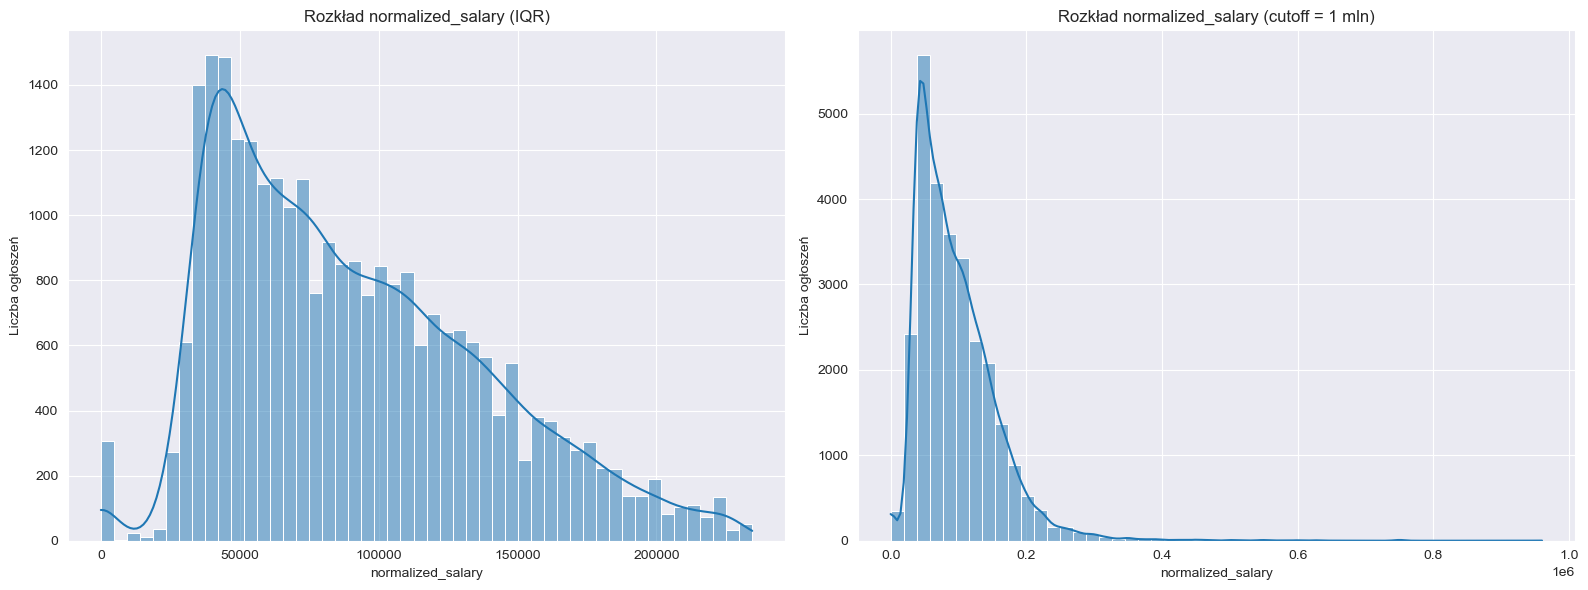

In [272]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# IQR
sns.histplot(postings_iqr['normalized_salary'], bins=50, kde=True, ax=axs[0])
axs[0].set_title('Rozkład normalized_salary (IQR)')
axs[0].set_xlabel('normalized_salary')
axs[0].set_ylabel('Liczba ogłoszeń')

# Arbitralny cutoff
sns.histplot(postings_cutoff['normalized_salary'], bins=50, kde=True, ax=axs[1])
axs[1].set_title('Rozkład normalized_salary (cutoff = 1 mln)')
axs[1].set_xlabel('normalized_salary')
axs[1].set_ylabel('Liczba ogłoszeń')

plt.tight_layout()
plt.show()


Porównanie podstawowych statystyk:

In [273]:
print("STATYSTYKI IQR")
print(postings_iqr['normalized_salary'].describe())

print("\nSTATYSTYKI CUTOFF")
print(postings_cutoff['normalized_salary'].describe())

STATYSTYKI IQR
count     27136.000000
mean      90488.670913
std       47527.179490
min           0.000000
25%       51000.000000
50%       80449.200000
75%      121945.200000
max      234500.000000
Name: normalized_salary, dtype: float64

STATYSTYKI CUTOFF
count     27809.000000
mean      95944.619856
std       60622.202842
min           0.000000
25%       52000.000000
50%       82500.000000
75%      125000.000000
max      960000.000000
Name: normalized_salary, dtype: float64




Kilka informacji po czyszczeniu:

In [274]:
print("Rozmiar danych PO CZYSZCZENIU:")
print(f"Liczba ofert: {len(postings_iqr)}")
print(f"Liczba kolumn: {postings_iqr.shape[1]}")
print(f"Liczba braków (po czyszczeniu): \n{postings_iqr.isna().sum().sort_values(ascending=False).head(10)}")

Rozmiar danych PO CZYSZCZENIU:
Liczba ofert: 27136
Liczba kolumn: 21
Liczba braków (po czyszczeniu): 
remote_allowed                 23618
job_id                             0
work_type_INTERNSHIP               0
experience_level_Internship        0
experience_level_Executive         0
experience_level_Entry             0
experience_level_Director          0
work_type_VOLUNTEER                0
work_type_TEMPORARY                0
work_type_PART_TIME                0
dtype: int64


Tymczasowe pokazanie kilku pierwszych wierszy wyczyszczonego wstępnie zbioru:

In [275]:
postings_iqr.head(10)

,job_id,company_name,title,pay_period,location,company_id,remote_allowed,application_type,normalized_salary,remote_flag,...,work_type_INTERNSHIP,work_type_OTHER,work_type_PART_TIME,work_type_TEMPORARY,work_type_VOLUNTEER,experience_level_Director,experience_level_Entry,experience_level_Executive,experience_level_Internship,experience_level_Mid-Senior
85,2558399667,"I.T. Solutions, Inc.","Validation Engineer, Labware LIMS",HOURLY,"Foster City, CA",2610793.0,NaN,ComplexOnsiteApply,135200.0,0,...,False,False,False,False,False,False,False,False,False,True
101,2989631782,ActOne Group,Administrative Assistant - CONCUR,YEARLY,"New York, NY",3496915.0,NaN,ComplexOnsiteApply,82500.0,0,...,False,False,False,False,False,False,False,False,False,False
109,3177010992,ABC Farigua Division,Customer Service Representative,YEARLY,"Greater Orlando, FL",72313277.0,NaN,ComplexOnsiteApply,90000.0,0,...,False,False,False,False,False,False,True,False,False,False
169,3550388220,TECHEAD,Inbound Call Center Specialist,HOURLY,"Richmond, VA",33605.0,NaN,ComplexOnsiteApply,38480.0,0,...,False,False,False,False,False,False,False,False,False,False
194,3614817348,Prolink,Tool and Die Maker,HOURLY,Cincinnati Metropolitan Area,2447993.0,NaN,ComplexOnsiteApply,69680.0,0,...,False,False,False,False,False,False,False,False,False,False
195,3619548798,"Dexterity, Inc.",Senior Mechanical Engineer,YEARLY,"Redwood City, CA",28173564.0,NaN,OffsiteApply,170000.0,0,...,False,False,False,False,False,False,False,False,False,True
198,3627141928,Staff Management | SMX,Quality Engineer,HOURLY,"New Albany, IN",14336.0,NaN,ComplexOnsiteApply,73840.0,0,...,False,False,False,False,False,False,False,False,False,False
221,3681437990,Ascendion,Quality Assurance Specialist,YEARLY,"Seattle, WA",86694680.0,NaN,OffsiteApply,66000.0,0,...,False,False,False,False,False,False,False,False,False,False
244,3704190127,Premier Brands Group Holdings,"Technical Designer, Womans Denim Bottoms",YEARLY,New York City Metropolitan Area,80318658.0,NaN,SimpleOnsiteApply,85000.0,0,...,False,False,False,False,False,False,False,False,False,True
373,3803052628,Insight Global,Flight Software Engineer,YEARLY,"Webster, TX",11056.0,NaN,ComplexOnsiteApply,155000.0,0,...,False,False,False,False,False,False,False,False,False,True


Sprawdzenie location:

In [276]:
# Policzmy długość location – 2 przecinki = city, state, country (czyli 3 pola); 1 przecinek = city, state; brak przecinka = tylko kraj

postings_iqr['location_comma_count'] = postings_iqr['location'].str.count(',')

# Rekordy tylko z krajem (np. "United States")
only_country = postings_iqr[postings_iqr['location_comma_count'] == 0]
print(f"Liczba rekordów z samym krajem: {len(only_country)}")

# Rekordy z City, ST (1 przecinek)
city_state = postings_iqr[postings_iqr['location_comma_count'] == 1]
print(f"Liczba rekordów z miastem i stanem: {len(city_state)}")

# Rekordy z City, ST, Country (2 przecinki)
full_location = postings_iqr[postings_iqr['location_comma_count'] == 2]
print(f"Liczba rekordów z pełną lokalizacją: {len(full_location)}")

Liczba rekordów z samym krajem: 3285
Liczba rekordów z miastem i stanem: 23680
Liczba rekordów z pełną lokalizacją: 171


In [277]:
# Rekordy, gdzie location to tylko kraj (brak przecinka)
only_country = postings_iqr[postings_iqr['location'].str.count(',') == 0]

# Wyświetlenie unikalnych wartości
print("Unikalne wartości 'location' dla rekordów zawierających tylko kraj:")
print(only_country['location'].value_counts())

Unikalne wartości 'location' dla rekordów zawierających tylko kraj:
location
United States                      1892
New York City Metropolitan Area     357
Los Angeles Metropolitan Area       115
San Francisco Bay Area              100
Dallas-Fort Worth Metroplex          72
                                   ... 
Maui                                  1
Lawton Area                           1
South Bend-Mishawaka Region           1
Baton Rouge Metropolitan Area         1
Greater McAllen Area                  1
Name: count, Length: 102, dtype: int64


Kolumna location zostanie zmodyfikowana i ustandaryzowana na dalszym etapie.

Dodatkowe sprawdzenie/podsumowanie:

In [278]:
postings_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27136 entries, 85 to 123848
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   job_id                       27136 non-null  int64  
 1   company_name                 27136 non-null  object 
 2   title                        27136 non-null  object 
 3   pay_period                   27136 non-null  object 
 4   location                     27136 non-null  object 
 5   company_id                   27136 non-null  float64
 6   remote_allowed               3518 non-null   float64
 7   application_type             27136 non-null  object 
 8   normalized_salary            27136 non-null  float64
 9   remote_flag                  27136 non-null  int32  
 10  work_type_FULL_TIME          27136 non-null  bool   
 11  work_type_INTERNSHIP         27136 non-null  bool   
 12  work_type_OTHER              27136 non-null  bool   
 13  work_type_PART_TIME

In [279]:
print(postings_iqr.columns.tolist())

['job_id', 'company_name', 'title', 'pay_period', 'location', 'company_id', 'remote_allowed', 'application_type', 'normalized_salary', 'remote_flag', 'work_type_FULL_TIME', 'work_type_INTERNSHIP', 'work_type_OTHER', 'work_type_PART_TIME', 'work_type_TEMPORARY', 'work_type_VOLUNTEER', 'experience_level_Director', 'experience_level_Entry', 'experience_level_Executive', 'experience_level_Internship', 'experience_level_Mid-Senior', 'location_comma_count']


Usunięcie zbędnych kolumn:

In [280]:
postings_iqr.drop(columns=['remote_allowed', 'location_comma_count'], inplace=True)

In [281]:
postings_iqr.head(15)

,job_id,company_name,title,pay_period,location,company_id,application_type,normalized_salary,remote_flag,work_type_FULL_TIME,work_type_INTERNSHIP,work_type_OTHER,work_type_PART_TIME,work_type_TEMPORARY,work_type_VOLUNTEER,experience_level_Director,experience_level_Entry,experience_level_Executive,experience_level_Internship,experience_level_Mid-Senior
85,2558399667,"I.T. Solutions, Inc.","Validation Engineer, Labware LIMS",HOURLY,"Foster City, CA",2610793.0,ComplexOnsiteApply,135200.0,0,False,False,False,False,False,False,False,False,False,False,True
101,2989631782,ActOne Group,Administrative Assistant - CONCUR,YEARLY,"New York, NY",3496915.0,ComplexOnsiteApply,82500.0,0,True,False,False,False,False,False,False,False,False,False,False
109,3177010992,ABC Farigua Division,Customer Service Representative,YEARLY,"Greater Orlando, FL",72313277.0,ComplexOnsiteApply,90000.0,0,True,False,False,False,False,False,False,True,False,False,False
169,3550388220,TECHEAD,Inbound Call Center Specialist,HOURLY,"Richmond, VA",33605.0,ComplexOnsiteApply,38480.0,0,False,False,False,False,False,False,False,False,False,False,False
194,3614817348,Prolink,Tool and Die Maker,HOURLY,Cincinnati Metropolitan Area,2447993.0,ComplexOnsiteApply,69680.0,0,True,False,False,False,False,False,False,False,False,False,False
195,3619548798,"Dexterity, Inc.",Senior Mechanical Engineer,YEARLY,"Redwood City, CA",28173564.0,OffsiteApply,170000.0,0,True,False,False,False,False,False,False,False,False,False,True
198,3627141928,Staff Management | SMX,Quality Engineer,HOURLY,"New Albany, IN",14336.0,ComplexOnsiteApply,73840.0,0,True,False,False,False,False,False,False,False,False,False,False
221,3681437990,Ascendion,Quality Assurance Specialist,YEARLY,"Seattle, WA",86694680.0,OffsiteApply,66000.0,0,True,False,False,False,False,False,False,False,False,False,False
244,3704190127,Premier Brands Group Holdings,"Technical Designer, Womans Denim Bottoms",YEARLY,New York City Metropolitan Area,80318658.0,SimpleOnsiteApply,85000.0,0,True,False,False,False,False,False,False,False,False,False,True
373,3803052628,Insight Global,Flight Software Engineer,YEARLY,"Webster, TX",11056.0,ComplexOnsiteApply,155000.0,0,True,False,False,False,False,False,False,False,False,False,True


Sprawdzenie czy application_type ma związek z płacą, w tym celu sprawdzę średnie wynagrodzenie dla każdej kategorii:

In [282]:
postings_iqr.groupby('application_type')['normalized_salary'].mean().sort_values(ascending=False)

application_type
UnknownApply          121850.000000
ComplexOnsiteApply     99674.729822
SimpleOnsiteApply      94103.885855
OffsiteApply           85380.871457
Name: normalized_salary, dtype: float64

Różnice są niewielkie, dlatego decyduję się na usunięcie kolumny, ponieważ nie będzie ona oddziaływać na płacę w znacznym stopniu.

In [283]:
postings_iqr.drop(columns=['application_type'], inplace=True)

Dane po wyczyszczeniu:

In [284]:
postings_iqr.head(15)

,job_id,company_name,title,pay_period,location,company_id,normalized_salary,remote_flag,work_type_FULL_TIME,work_type_INTERNSHIP,work_type_OTHER,work_type_PART_TIME,work_type_TEMPORARY,work_type_VOLUNTEER,experience_level_Director,experience_level_Entry,experience_level_Executive,experience_level_Internship,experience_level_Mid-Senior
85,2558399667,"I.T. Solutions, Inc.","Validation Engineer, Labware LIMS",HOURLY,"Foster City, CA",2610793.0,135200.0,0,False,False,False,False,False,False,False,False,False,False,True
101,2989631782,ActOne Group,Administrative Assistant - CONCUR,YEARLY,"New York, NY",3496915.0,82500.0,0,True,False,False,False,False,False,False,False,False,False,False
109,3177010992,ABC Farigua Division,Customer Service Representative,YEARLY,"Greater Orlando, FL",72313277.0,90000.0,0,True,False,False,False,False,False,False,True,False,False,False
169,3550388220,TECHEAD,Inbound Call Center Specialist,HOURLY,"Richmond, VA",33605.0,38480.0,0,False,False,False,False,False,False,False,False,False,False,False
194,3614817348,Prolink,Tool and Die Maker,HOURLY,Cincinnati Metropolitan Area,2447993.0,69680.0,0,True,False,False,False,False,False,False,False,False,False,False
195,3619548798,"Dexterity, Inc.",Senior Mechanical Engineer,YEARLY,"Redwood City, CA",28173564.0,170000.0,0,True,False,False,False,False,False,False,False,False,False,True
198,3627141928,Staff Management | SMX,Quality Engineer,HOURLY,"New Albany, IN",14336.0,73840.0,0,True,False,False,False,False,False,False,False,False,False,False
221,3681437990,Ascendion,Quality Assurance Specialist,YEARLY,"Seattle, WA",86694680.0,66000.0,0,True,False,False,False,False,False,False,False,False,False,False
244,3704190127,Premier Brands Group Holdings,"Technical Designer, Womans Denim Bottoms",YEARLY,New York City Metropolitan Area,80318658.0,85000.0,0,True,False,False,False,False,False,False,False,False,False,True
373,3803052628,Insight Global,Flight Software Engineer,YEARLY,"Webster, TX",11056.0,155000.0,0,True,False,False,False,False,False,False,False,False,False,True


## Dodatkowe dane:

In [285]:
print(employee_counts.head(3))

   company_id  employee_count  follower_count  time_recorded
0      391906             186           32508     1712346173
1    22292832             311            4471     1712346173
2       20300            1053            6554     1712346173


In [286]:
print(employee_counts['employee_count'].describe())

count     35787.000000
mean       6715.874256
std       29400.984643
min           0.000000
25%          56.000000
50%         418.000000
75%        2945.000000
max      751125.000000
Name: employee_count, dtype: float64


In [287]:
employee_counts['time_recorded'].value_counts()

time_recorded
1713550029    49
1713467554    47
1713458509    46
1713458777    45
1713557052    42
              ..
1713489951     1
1712654669     1
1712902749     1
1712860908     1
1712460745     1
Name: count, Length: 3531, dtype: int64

In [288]:
pd.to_datetime(employee_counts['time_recorded'], unit='s').sort_values().unique()

<DatetimeArray>
['2024-04-05 19:42:53', '2024-04-05 19:44:08', '2024-04-05 19:45:23',
 '2024-04-05 19:46:37', '2024-04-05 19:47:52', '2024-04-05 19:49:06',
 '2024-04-05 19:50:21', '2024-04-05 19:51:35', '2024-04-05 19:52:49',
 '2024-04-05 19:54:03',
 ...
 '2024-04-20 00:01:25', '2024-04-20 00:04:26', '2024-04-20 00:07:44',
 '2024-04-20 00:11:19', '2024-04-20 00:14:32', '2024-04-20 00:18:41',
 '2024-04-20 00:20:27', '2024-04-20 00:23:46', '2024-04-20 00:23:47',
 '2024-04-20 00:27:39']
Length: 3531, dtype: datetime64[ns]

Dodanie liczby pracowników employee_counts+company_id, utworzenie w ten sposób kolumny z rozmiarem firmy.

In [289]:
# wybranie najnowszych danych dla każdej firmy
latest_employees = employee_counts.sort_values('time_recorded').drop_duplicates('company_id', keep='last')

# dołączenie employee_count do postings_merged
postings_merged = postings_iqr.merge(latest_employees[['company_id', 'employee_count']], on='company_id', how='left')

def categorize_size(n):
    if pd.isna(n):
        return 'unknown'
    elif n < 50:
        return 'micro'
    elif n < 250:
        return 'small'
    elif n < 1000:
        return 'medium'
    else:
        return 'large'

postings_merged['company_size_cat'] = postings_merged['employee_count'].apply(categorize_size)

# kodowanie kategorii
postings_merged = pd.get_dummies(postings_merged, columns=['company_size_cat'], prefix='size')

Sprawdzenie co z tego wyszło:

In [290]:
postings_merged.head(10)

,job_id,company_name,title,pay_period,location,company_id,normalized_salary,remote_flag,work_type_FULL_TIME,work_type_INTERNSHIP,...,experience_level_Director,experience_level_Entry,experience_level_Executive,experience_level_Internship,experience_level_Mid-Senior,employee_count,size_large,size_medium,size_micro,size_small
0,2558399667,"I.T. Solutions, Inc.","Validation Engineer, Labware LIMS",HOURLY,"Foster City, CA",2610793.0,135200.0,0,False,False,...,False,False,False,False,True,85,False,False,False,True
1,2989631782,ActOne Group,Administrative Assistant - CONCUR,YEARLY,"New York, NY",3496915.0,82500.0,0,True,False,...,False,False,False,False,False,141,False,False,False,True
2,3177010992,ABC Farigua Division,Customer Service Representative,YEARLY,"Greater Orlando, FL",72313277.0,90000.0,0,True,False,...,False,True,False,False,False,1,False,False,True,False
3,3550388220,TECHEAD,Inbound Call Center Specialist,HOURLY,"Richmond, VA",33605.0,38480.0,0,False,False,...,False,False,False,False,False,81,False,False,False,True
4,3614817348,Prolink,Tool and Die Maker,HOURLY,Cincinnati Metropolitan Area,2447993.0,69680.0,0,True,False,...,False,False,False,False,False,2166,True,False,False,False
5,3619548798,"Dexterity, Inc.",Senior Mechanical Engineer,YEARLY,"Redwood City, CA",28173564.0,170000.0,0,True,False,...,False,False,False,False,True,224,False,False,False,True
6,3627141928,Staff Management | SMX,Quality Engineer,HOURLY,"New Albany, IN",14336.0,73840.0,0,True,False,...,False,False,False,False,False,2718,True,False,False,False
7,3681437990,Ascendion,Quality Assurance Specialist,YEARLY,"Seattle, WA",86694680.0,66000.0,0,True,False,...,False,False,False,False,False,2548,True,False,False,False
8,3704190127,Premier Brands Group Holdings,"Technical Designer, Womans Denim Bottoms",YEARLY,New York City Metropolitan Area,80318658.0,85000.0,0,True,False,...,False,False,False,False,True,335,False,True,False,False
9,3803052628,Insight Global,Flight Software Engineer,YEARLY,"Webster, TX",11056.0,155000.0,0,True,False,...,False,False,False,False,True,14128,True,False,False,False


In [291]:
postings_merged.shape

(27136, 24)

In [292]:
print(postings_merged.columns.tolist())

['job_id', 'company_name', 'title', 'pay_period', 'location', 'company_id', 'normalized_salary', 'remote_flag', 'work_type_FULL_TIME', 'work_type_INTERNSHIP', 'work_type_OTHER', 'work_type_PART_TIME', 'work_type_TEMPORARY', 'work_type_VOLUNTEER', 'experience_level_Director', 'experience_level_Entry', 'experience_level_Executive', 'experience_level_Internship', 'experience_level_Mid-Senior', 'employee_count', 'size_large', 'size_medium', 'size_micro', 'size_small']


In [293]:
postings_merged.sample(5)

,job_id,company_name,title,pay_period,location,company_id,normalized_salary,remote_flag,work_type_FULL_TIME,work_type_INTERNSHIP,...,experience_level_Director,experience_level_Entry,experience_level_Executive,experience_level_Internship,experience_level_Mid-Senior,employee_count,size_large,size_medium,size_micro,size_small
18131,3903892105,C.H. Robinson,Senior DevSecOps - Secrets Engineer,YEARLY,"Eden Prairie, MN",162987.0,147950.0,0,True,False,...,False,False,False,False,True,19002,True,False,False,False
17313,3903823392,ezCater,Account Manager (Remote),YEARLY,United States,2579812.0,67500.0,1,True,False,...,False,False,False,False,True,958,False,True,False,False
23573,3905328813,RPM Living,Maintenance Technician,HOURLY,"Newberry, FL",1387626.0,48880.0,0,True,False,...,False,True,False,False,False,2243,True,False,False,False
17976,3903878014,QuinStreet,Product Marketing Manager,YEARLY,"Foster City, CA",6288.0,140923.0,0,True,False,...,False,False,False,False,True,941,False,True,False,False
24465,3905376402,CommuniCare+OLE,Perinatal Patient Care Services Coordinator,HOURLY,"Fairfield, CA",18118111.0,56940.0,0,False,False,...,False,True,False,False,False,168,False,False,False,True


Dodatkowe poprawki:

In [294]:
postings_merged = postings_merged.drop(columns=['company_name']).copy()

In [295]:
pay_period_dummies = pd.get_dummies(postings_merged['pay_period'], prefix='pay_period')
postings_merged = pd.concat([postings_merged.drop(columns=['pay_period']), pay_period_dummies], axis=1).copy()

In [296]:
bool_cols = postings_merged.select_dtypes(include='bool').columns
postings_merged[bool_cols] = postings_merged[bool_cols].astype(int)

In [297]:
postings_merged.sample(5)

,job_id,title,location,company_id,normalized_salary,remote_flag,work_type_FULL_TIME,work_type_INTERNSHIP,work_type_OTHER,work_type_PART_TIME,...,employee_count,size_large,size_medium,size_micro,size_small,pay_period_BIWEEKLY,pay_period_HOURLY,pay_period_MONTHLY,pay_period_WEEKLY,pay_period_YEARLY
8051,3898164334,Branch Manager,"San Antonio, TX",2461983.0,110000.0,0,1,0,0,0,...,19,0,0,1,0,0,0,0,0,1
10407,3901350584,Sr Robotics End Effectors & Prototyping Engineer,"Ridgewood, NJ",5345313.0,135000.0,0,1,0,0,0,...,453,0,1,0,0,0,0,0,0,1
8535,3899516789,Director of Operations,"Los Angeles, CA",10696913.0,82500.0,0,1,0,0,0,...,78436,1,0,0,0,0,0,0,0,1
21459,3904961386,Commercial Real Estate Transaction Coordinator...,"Winter Park, FL",209004.0,65520.0,1,1,0,0,0,...,125,0,0,0,1,0,1,0,0,0
23177,3905301298,QC Microbiology,"Fort Worth, TX",27606163.0,59425.6,0,0,0,0,0,...,27,0,0,1,0,0,1,0,0,0


In [298]:
postings_merged.shape

(27136, 27)

Zapisanie do pliku csv, zeby nie powtarzac wszystkich kroków od początku:

In [299]:
postings_merged.to_csv("postings_cleaned_and_merged.csv", index=False)

In [300]:
postings_merged = pd.read_csv("postings_cleaned_and_merged.csv")

### Kolumna z lokalizacją
Ustandaryzowanie formatu lokalizacji, przygotowanie do geokodowania.

In [301]:
unique_locations = postings_merged['location'].nunique()
print(f"Liczba unikalnych lokalizacji: {unique_locations}")

Liczba unikalnych lokalizacji: 3910


In [302]:
# 1. Zliczamy przecinki
postings_merged['comma_count'] = postings_merged['location'].str.count(',')

# 2. Ustawiamy "remote" dla lokalizacji z 0 lub 2 przecinkami, ale gdzie można pracować zdalnie
postings_merged.loc[
    ((postings_merged['comma_count'] != 1) & (postings_merged['remote_flag'] == 1)),
    'location'
] = 'remote'

# 3. Usuwamy:
#    - lokalizacje z 2 przecinkami i remote_flag == 0
#    - lokalizacje z 0 przecinkami i remote_flag == 0, ale które nie są w wybranej liście "keep"

# Lista lokalizacji, które mimo braku przecinka chcemy zachować i ręcznie mapować
keep_no_comma_locs = [
    'San Francisco Bay Area',
    'New York City Metropolitan Area',
    'Los Angeles Metropolitan Area',
    'Greater Chicago Area',
    'Washington DC-Baltimore Area',
    'Atlanta Metropolitan Area',
    'Greater Boston',
    'Greater St. Louis',
    'Greater Seattle Area'
]

# Filtrowanie datasetu
postings_filtered = postings_merged[~(
        ((postings_merged['comma_count'] == 2) & (postings_merged['remote_flag'] == 0)) |
        ((postings_merged['comma_count'] == 0) &
         (postings_merged['remote_flag'] == 0) &
         (~postings_merged['location'].isin(keep_no_comma_locs)))
)].copy()

# 4. Mapowanie "obszarów" na City, ST
area_to_city_state = {
    'San Francisco Bay Area': 'San Francisco, CA',
    'New York City Metropolitan Area': 'New York, NY',
    'Los Angeles Metropolitan Area': 'Los Angeles, CA',
    'Greater Chicago Area': 'Chicago, IL',
    'Washington DC-Baltimore Area': 'Washington, DC',
    'Atlanta Metropolitan Area': 'Atlanta, GA',
    'Greater Boston': 'Boston, MA',
    'Greater St. Louis': 'St. Louis, MO',
    'Greater Seattle Area': 'Seattle, WA'
}
postings_filtered['location'] = postings_filtered['location'].replace(area_to_city_state)

# 5. Ostateczna walidacja – zostawiamy tylko lokalizacje z dokładnie 1 przecinkiem lub "remote"
postings_filtered['comma_count'] = postings_filtered['location'].str.count(',')
postings_final = postings_filtered[
    (postings_filtered['comma_count'] == 1) | (postings_filtered['location'] == 'remote')
    ].copy()

# Usuwamy pomocniczą kolumnę comma_count
postings_final.drop(columns='comma_count', inplace=True)

In [303]:
# 30 losowych lokalizacji
print(postings_final['location'].dropna().sample(30, random_state=42).values)

# 10 losowych rekordów
postings_final.sample(10, random_state=42)

['Oklahoma City, OK' 'Philadelphia, PA' 'Des Moines, IA' 'Orlando, FL'
 'New York, NY' 'Austin, TX' 'Fairfax County, VA' 'Indiana, United States'
 'California, United States' 'Sacramento County, CA' 'New York, NY'
 'remote' 'Grimes, IA' 'Post Falls, ID' 'remote' 'San Francisco, CA'
 'Illinois, United States' 'Milwaukee, WI' 'Germantown, TN'
 'Port Chester, NY' 'Old Fort, NC' 'Pasadena, TX'
 'Greater Birmingham, Alabama Area' 'remote' 'Covina, CA' 'Round Lake, IL'
 'Texas, United States' 'Washington, DC' 'Seattle, WA' 'remote']


,job_id,title,location,company_id,normalized_salary,remote_flag,work_type_FULL_TIME,work_type_INTERNSHIP,work_type_OTHER,work_type_PART_TIME,...,employee_count,size_large,size_medium,size_micro,size_small,pay_period_BIWEEKLY,pay_period_HOURLY,pay_period_MONTHLY,pay_period_WEEKLY,pay_period_YEARLY
2568,3887702206,Innovation Coordinator,"Oklahoma City, OK",40783.0,58500.000,0,0,0,0,0,...,206,0,0,0,1,0,0,0,0,1
11382,3901616977,Clerk Typist - PCA Care Connections,"Philadelphia, PA",37862.0,30821.975,0,1,0,0,0,...,929,0,1,0,0,0,0,0,0,1
19126,3904386588,Solution Architect (Remote),"Des Moines, IA",1680.0,120000.000,1,1,0,0,0,...,313972,1,0,0,0,0,0,0,0,1
5113,3891077259,Paralegal,"Orlando, FL",6088.0,65000.000,0,1,0,0,0,...,5099,1,0,0,0,0,0,0,0,1
7327,3895550373,Enterprise Payments Data Analytics Business An...,"New York, NY",1235.0,151350.000,0,1,0,0,0,...,194312,1,0,0,0,0,0,0,0,1
12667,3901949010,Conflicts Attorney,"Austin, TX",29104.0,160000.000,0,1,0,0,0,...,416,0,1,0,0,0,0,0,0,1
8769,3899529161,Lead Data Analyst,"Fairfax County, VA",10333877.0,156000.000,0,0,0,0,0,...,28,0,0,1,0,0,1,0,0,0
2195,3887106121,Business Development Manager,"Indiana, United States",11056.0,125000.000,0,1,0,0,0,...,14128,1,0,0,0,0,0,0,0,1
5242,3891083166,Test Analyst-79340,"California, United States",731128.0,109200.000,1,0,0,0,0,...,239,0,0,0,1,0,1,0,0,0
354,3884442267,INFORMATION TECHNOLOGY SPECIALIST II,"Sacramento County, CA",787339.0,114138.000,0,1,0,0,0,...,3240,1,0,0,0,0,0,1,0,0


In [304]:
postings_final.sample(10)

,job_id,title,location,company_id,normalized_salary,remote_flag,work_type_FULL_TIME,work_type_INTERNSHIP,work_type_OTHER,work_type_PART_TIME,...,employee_count,size_large,size_medium,size_micro,size_small,pay_period_BIWEEKLY,pay_period_HOURLY,pay_period_MONTHLY,pay_period_WEEKLY,pay_period_YEARLY
6124,3894556596,PT AFTER-SCH CARE ACT LEAD I_CORAL REEF ELEMEN...,"Miami, FL",9626.0,31200.0,0,1,0,0,0,...,19906,1,0,0,0,0,1,0,0,0
18681,3904362638,"Senior Manager, DSP Inventory Partnerships",remote,18763.0,135000.0,1,1,0,0,0,...,1759,1,0,0,0,0,0,0,0,1
12246,3901939637,Pharmacist,"Rochester, NY",18472079.0,124800.0,0,1,0,0,0,...,2554,1,0,0,0,0,1,0,0,0
7014,3895486821,Licensed Practical Nurse $32/hour,"Flemington, NJ",1457175.0,32.0,0,1,0,0,0,...,277,0,1,0,0,0,0,0,0,1
23472,3905323639,"Senior Engineer, Gas Planning and Design Engin...","Waltham, MA",5913.0,127500.0,0,1,0,0,0,...,15087,1,0,0,0,0,0,0,0,1
25004,3905686506,Billing Analyst,"San Diego, CA",249657.0,60320.0,0,0,0,0,0,...,116,0,0,0,1,0,1,0,0,0
7591,3895807904,"Field Director, Therapeutic Education Leadersh...","Minneapolis, MN",1642.0,164062.5,0,1,0,0,0,...,86201,1,0,0,0,0,0,0,0,1
15980,3902939708,"School Food Services Manager I, II - Kahaluu E...","Kaneohe, HI",1946139.0,62964.6,0,1,0,0,0,...,3419,1,0,0,0,0,0,1,0,0
1145,3885115010,Security Specialist,"Manhattan, NY",1536386.0,70000.0,0,1,0,0,0,...,463,0,1,0,0,0,0,0,0,1
24435,3905375174,Business Development Manager,"New York, NY",281315.0,82500.0,0,1,0,0,0,...,18,0,0,1,0,0,0,0,0,1


In [305]:
postings_filtered['title'].sample(30)

21247               Journeyman Pipefitter, HVAC, San Diego
19806                                       Chief Engineer
9749        Senior Consultant, Sage Intacct Implementation
1216              Junior data scientist/software developer
7769                                Industrial Electrician
14670                          Temporary, Digital Designer
38                               Customer Advocacy Manager
9534                                            Mig Welder
3358                                Senior Accountant, CPA
18811                                      ER Veterinarian
9185                            Java/Web Services Engineer
21076    Interior Designer for a Real Estate Investment...
11091                 Accountant III -Financial Reporting 
24154                                  RN - Long Term Care
9088                            Risk Management Specialist
4075                               Apprentice - Electrical
12613    CX Service Industries - Principal Sales Consul.

### Kolumna title
Stworzenie słownika, w którym kluczami są profesje, a wartościami słowa kluczowe z 'title' pasujące do danej profesji

In [306]:
category_to_keywords = {
    'industry': [
        'technician', 'mechanic', 'electrician', 'repair', 'construction',
        'machine','welder', 'assembler', 'forklift', 'warehouse', 'fabricator',
        'installer','plumber', 'toolmaker', 'laundering', 'loader', 'line', 'lamination',
        'relay', 'shipper', 'tool', 'carwash', 'materials', 'architect',  'electrical',
        'production','utility', 'logistics', 'manufacturing', 'maintenance', 'producer',
        'estimator', 'technologist', 'jeweler', 'groundskeeper', 'cabinet','residential',
        'procurement', 'delivery', 'config', 'fleet', 'sourcing', 'key holder', 'picker',
        'industry', 'foreman', 'shift','control', 'metallurgist', 'ehs', 'shipping', 'argonomy',
        'stocking', 'journeyman', 'keyholder', 'carwash', 'builder', 'officer',
        'captain', 'automotive', 'field', 'runner', 'chief', 'linen', 'protection',
        'automation', 'sealer', 'inventory', 'storeroom', 'safety', 
        'fulfillment', 'firefighter', 'guard', 'rigger', 'landman', 'proofreader', 'packager', 
        'handler', 'installer', 'rep', 'splicer', 'carpenter', 'drywall', 'pilot', 'distribution',
        'waste handler', 'machinist', 'cycle counter', 'joiner', 'upholsterer', 'chemical mixer', 
        'truss sawyer', 'ramp service', 'packer', 'mold maker', 'archaeologist', 'cutter', 'archeologist', 
        'roofer', 'nuclear', 'stock crew', 'assembly', 'farm', 'auto collector', 'millwright', 'sorter', 
        'concrete finisher'
    ],
    'healthcare': [
        'nurse', 'nursing', 'paramedic', 'therapist', 'medical', 'psychologist',
        'veterinarian', 'pharmacist', 'phlebotomist', 'endoscopy', 'emergency', 'patient',
        'surgeon', 'oncology', 'clinical', 'chemist', 'mri', 'neuroscience', 'janitor',
        'housekeeping', 'dental', 'icu', 'surgery', 'physician',
        'neurologist', 'psych', 'cardiology', 'optometrist', 'hygienist',
        'anesthesiology', 'endocrinologist', 'travel rrt', 'dialysis', 'scientist', 'medicine', 'support', 'social', 'psychiatric',
        'pharmacy', 'laboratory', 'bioprocess', 'care', 'surgical', 'lab', 'molecular', 'pathologist', 'sonographer', 'health', 'biostatistician', 'telemetry', 'veterinary', 'clinician', 'med', 'dentist', 'pharm', 'clinic', 'cna', 'specimen', 'risk', 'therapy', 'ambulatory', 'x-ray', 'ultrasound', 'doula', 'lpn', 'intake', 'provider', 'disorder', 'life', 'rn', 'pacu', 'fte',
        'advanced practice professional', 'radiologist', 'pt', 'bcba', 'chiropractor', 'cra', 'pediatrician', 'epidemiologist', 'urology',
        'endodontist', 'dsp', 'lna'
    ],
    'it': [
        'engineer', 'developer', 'analyst', 'designer', 'digital', 'software',
        'programming', 'programmer', 'tester', 'ai', 'ml', 'data', 'sql', 'oracle',
        'implementation', 'communications', 'network', 'bi', 'c++', 'product owner',
        'sre', 'web', 'config', 'chart', 'development', 'editor', 'simulation', 'front desk', 'help desk', 'it', 'project', 
        'cad', 'cmmc', 'pm', 'scrum master', 'cnc', 'intelligence', 'design', 'product manager', 'information', 'testing', 'enablement', 'desk',
        'qa', 'excel', 'cyber', 'server', 'programmatic', 'integrator', 'ap', 'dba', 'humint', 'google', 'analytics', 'tech', 'analysis',
        'product manager', 'product manger', 'd365', 'functional lead', 'infrastructure', 'devloper', 'develope', 'postgres', 'hp', 'ux', 'prisma', 'sdet', 'mts1'
        
    ],
    'administration': [ 
        'manager', 'director', 'administrator', 'administrative', 'controller',
        'supervisor', 'coordinator', 'principal', 'office', 'admin', 'executive',
        'leader', 'vice president', 'ms', 'management', 'human resouces', 'hr', 'commercial', 'human recources', 'clerical', 'clerk',
        'administration', 'superintendent', 'investigator', 'recruitment', 'media', 'assoc', 'custodian', 'enterprise', 'planner',
        'leasing', 'corp', 'secretary', 'branch', 'bookkeeper', 'scheduler', 'documentation', 'human resource', 'credentialing', 'admissions', 'hiring', 'surveyor', 'palatine', 'houseman', 'strategist', 'scheduling', 'marketing', 'specialist', 'processor', 'recruitment',
        'operations', 'assistant', 'change management', 'personnel', 'experience owner', 'people operations', 'vp', 'employee success', 'head',
        'experience expert', 'mgr', 'strategy', 'lead', 'dir', 'assessor', 'department', 'venture fellow', 'agency', 'manger', 'talent', 
        'partner', 'purchasing', 'allocator'
    ],
    'education': [
        'teacher', 'educator', 'school', 'professor', 'instructor', 'biologist',
        'physiologist', 'microbiology', 'biology', 'research', 'paleontologist',
        'k12', 'ecological', 'mentor', 'enrollment', 'environmental', 'education',
        'hydrogeologist','geophysicist', 'metrologist', 'guide', 'intern', 'tutor',
        'stormwater', 'internship', 'exam proctor', 'dean', 'registrar', 'lecturer',
        'teaching resident', 'student worker', 'teaching residency', 'scholarship',
        'math', 'foundation'
    ],
    'finance': [
        'accountant', 'auditor', 'tax', 'bank', 'finance', 'loan', 'credit',
        'mortgage', 'investment', 'treasurer', 'brokerage', 'assurance', 'financial',
        'buyer', 'billing','insurance', 'account', 'property', 'economist', 'agent',
        'fund', 'payment', 'estate', 'actuary', 'business', 'consultant', 'trader',
        'reporting', 'injury adjuster', 'market access', 'cfo', 'income', 'relations', 
        'promotion', 'injury examiner', 'monetization'
    ],
    'services': [
        'sales', 'host', 'payroll', 'customer', 'receptionist', 'cook',
        'housekeeper', 'caregiver', 'aide', 'receiver', 'merchandiser', 'detailer',
        'retail', 'restaurant', 'driver', 'barista', 'shopper', 'valet', 'spa',
        'cashier', 'housing', 'house', 'gallery', 'ambassador', 'content',
        'bartender', 'bilingual', 'image', 'illustrator', 'cinematics',  'linguist', 'security', 'chef', 'trainer', 'copywriter', 'writer',
        'operator', 'baker', 'piercer', 'laundry', 'coffe', 'coach', 'food', 'cake', 'esthetician', 'advertising', 'showroom', 'cleaner',
        'catering', 'culinary', 'call center', 'merchandise', 'banquets', 'groomer', 'bartenders', 'memorial', 'dishwasher', 'photographer', 
        'image', 'artist', 'printed', 'mentor', 'breakfast', 'e-commerce', 'porter', 'dispatcher', 'localization', 'kennel', 'selector',
        'behavior', 'glodocs', 'deckhand', 'wholesaler', 'rider', 'fsqr', 'beauty', 'merchandising', 'transportation', 'attendant', 'room',
        'relationship', 'influencer', 'recreation attendant', 'helper', 'client partner', 'busser', 'guest experience lead', 'steward',
        'crew member', 'interpreter', 'translator', 'show', 'arts', 'order', 'booker', 'merchant', 'marketer', 'donut', 'adjuster', 'music', 'outlet', 'clean-up', 'seller', 'ald gsm', 'concierge', 'grocery', 'deli', 'instore', 'team member', 'greeter'
    ],
    'law': [
        'attorney', 'paralegal', 'counsel', 'legal', 'representative', 'referral',
        'reviewer', 'advocate', 'prosecutor', 'government', 'advisor', 'inspector',
        'complaint', 'teller', 'negotiator', 'frleo', 'lawyer', 'compilance', 'deputy coroner', 
        'acm'
    ],
    'other': [
        'futurebean', 'esc', 'ukhc', 'prior', 
        'brookfield'
    ]
}

In [307]:
# Odwracamy słownik
keyword_category_map = {
    keyword: category
    for category, keywords in category_to_keywords.items()
    for keyword in keywords
}

In [308]:
def map_title_to_category(title):
    title_lower = title.lower()
    for keyword, category in keyword_category_map.items():
        if keyword in title_lower:
            return category
    return 'other'  # jeśli nie znajdzie nic dopasowanego

In [309]:
postings_filtered['category'] = postings_filtered['title'].apply(map_title_to_category)

Sprawdzenie ile rekordów przypisano do każdej kategorii:

In [310]:
postings_filtered['category'].value_counts()

category
it                7960
industry          6451
administration    5471
healthcare        4821
finance            722
services           659
law                133
education          132
other               21
Name: count, dtype: int64

In [311]:
#to samo ale w %
postings_filtered['category'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

category
it                30.19%
industry          24.46%
administration    20.75%
healthcare        18.28%
finance            2.74%
services            2.5%
law                 0.5%
education           0.5%
other              0.08%
Name: proportion, dtype: object

Wyswietlenie title zakwalifikowanych do other:

In [312]:
postings_filtered[postings_filtered['category'] == 'other']['title'].unique()

array(['Global VESL, Growth', 'DOC CORRECTIONAL SERGEANT',
       'Night Crew Full Time',
       'Springboard Innovation Fellow at Santa Barbara Hillel',
       'Subcontractor', 'Ayuda de Verano - Producción General',
       'Subject Matter Expert ', "Children's Group Worker",
       'FT-PARA I-PRE K HQP_W. HIALEAH GARDENS E(1237100)', 'ST',
       'SLP 24-25 SY', 'Cooler Lumper', 'Peer Navigator-IMPACT',
       'Product Expert (Saturday - Wednesday)',
       'FSO FAAS-BCM-Senior-South-Central-Northeast-New England-Mid Atlantic',
       'Senior ESC', 'Adult-Family-NP-Buffalo-NY', 'RCA Professional'],
      dtype=object)

Usunięcie rekordów, których category == other:

In [313]:
postings_filtered = postings_filtered[postings_filtered['category'] != 'other']

Sprawdzenie ile % jest rekordów dla każdej z profesji:

In [314]:
postings_filtered['category'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

category
it                30.21%
industry          24.48%
administration    20.76%
healthcare         18.3%
finance            2.74%
services            2.5%
law                 0.5%
education           0.5%
Name: proportion, dtype: object

Kontrolne sprawdzenie jak wyglada aktualnie dataframe + jego struktura.

In [315]:
postings_filtered.shape

(26349, 29)

In [316]:
postings_filtered.sample(30)

,job_id,title,location,company_id,normalized_salary,remote_flag,work_type_FULL_TIME,work_type_INTERNSHIP,work_type_OTHER,work_type_PART_TIME,...,size_medium,size_micro,size_small,pay_period_BIWEEKLY,pay_period_HOURLY,pay_period_MONTHLY,pay_period_WEEKLY,pay_period_YEARLY,comma_count,category
277,3884439564,Territory Sales Manager - Memphis,"Memphis, TN",6374991.0,62500.0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,it
527,3884812895,Summer Intern- Chemistry Field Testing (travel...,"Denver, CO",13901.0,41080.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,industry
20206,3904568646,"Associate Director, Endless Frontier Labs","New York, NY",3157.0,115000.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,healthcare
15098,3902829929,Industrial Equipment Maintenance Technicians,"Appleton, WI",7260.0,69149.6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,industry
1589,3885861841,Full Time Nabisco Merchandiser/Order Writer,"Carol Stream, IL",1511.0,35360.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,it
10591,3901357944,"RN, Coord, Structural Heart Prgm","Fountain Valley, CA",2700663.0,153202.4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,healthcare
14345,3902745534,Solutions Architect (Day One Onsite),"Omaha, NE",79383535.0,135000.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,industry
18474,3904092840,Electro-Mechanical Buyer,"Billerica, MA",79383535.0,78000.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,industry
18240,3904055167,Supervisory Criminal Investigator (Branch Chief),"Sterling, VA",162570.0,160305.5,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,industry
13708,3902346349,Information Technology Operations Engineer,remote,11056.0,102500.0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,it


Checkpoint - zapisanie obecnego dataframe do pliku csv.

In [329]:
postings_filtered.to_csv("postings_ready_for_geo.csv", index=False)

## Geokodowanie

In [330]:
# Wczytanie danych
df = pd.read_csv("postings_ready_for_geo.csv")

# Wyciągnięcie unikalnych lokalizacji
location_df = pd.DataFrame(df['location'].dropna().unique(), columns=['location'])

# Usuwamy "remote"
location_df = location_df[location_df['location'].str.lower() != 'remote'].reset_index(drop=True)

print(f"Do geokodowania: {len(location_df)} lokalizacji")

Do geokodowania: 3761 lokalizacji


In [331]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import time

# 3. Ustawienie geokodera
geolocator = Nominatim(user_agent="geoapi")
geocode = RateLimiter(
    geolocator.geocode,
    min_delay_seconds=1,
    max_retries=5,
    error_wait_seconds=5,
    swallow_exceptions=True
)

# 4. Funkcja do bezpiecznego geokodowania jednej lokalizacji
def safe_geocode(loc):
    try:
        return geocode(loc, timeout=10)
    except Exception as e:
        print(f"Błąd przy {loc}: {e}")
        return None

# 5. Funkcja do przetwarzania porcji
def geocode_location_batch(location_df_part):
    df_part = location_df_part.copy()
    df_part['location_data'] = df_part['location'].apply(safe_geocode)
    df_part['latitude'] = df_part['location_data'].apply(lambda x: x.latitude if x else None)
    df_part['longitude'] = df_part['location_data'].apply(lambda x: x.longitude if x else None)
    return df_part.drop(columns='location_data')

# 6. Dzielimy na partie
batch_size = 500
geo_results = []

for i in range(0, len(location_df), batch_size):
    print(f"Geokoduję batch {i // batch_size + 1} ({i}–{min(i + batch_size, len(location_df))})...")
    batch = location_df.iloc[i:i + batch_size]
    result = geocode_location_batch(batch)
    geo_results.append(result)
    time.sleep(1)  # krótka przerwa między batchami, żeby serwer odpoczął

# 7. Łączymy i zapisujemy do pliku
geo_final = pd.concat(geo_results, ignore_index=True)
geo_final.to_csv("geocoded_locations.csv", index=False)
print("Gotowe! Wyniki zapisano do geocoded_locations.csv")

# 8. Można też później odczytać:
# geo_final = pd.read_csv("geocoded_locations.csv")

# 9. Łączenie z oryginalnym df po location
df_with_geo = df.merge(geo_final, on="location", how="left")

Geokoduję batch 1 (0–500)...
Geokoduję batch 2 (500–1000)...
Geokoduję batch 3 (1000–1500)...
Geokoduję batch 4 (1500–2000)...
Geokoduję batch 5 (2000–2500)...
Geokoduję batch 6 (2500–3000)...
Geokoduję batch 7 (3000–3500)...
Geokoduję batch 8 (3500–3761)...
Gotowe! Wyniki zapisano do geocoded_locations.csv


### Zapisanie wyników do pliku geocoded_locations.csv

In [332]:
geo_final = pd.read_csv("geocoded_locations.csv")

In [333]:
geo_final.sample(10)

,location,latitude,longitude
1595,"Scott AFB, IL",38.543839,-89.852774
888,"Wheaton, IL",41.864696,-88.110171
87,"Memphis, TN",35.146025,-90.051764
2503,"Commerce, CA",34.003218,-118.154196
58,"Boston, MA",42.355433,-71.060511
657,"London, OH",39.886449,-83.448253
3113,"Norwalk, OH",41.242422,-82.615574
2693,"Seminole County, OK",35.170594,-96.626349
967,"Somers, WI",42.640428,-87.914773
3425,"Upper Macungie, PA",40.565039,-75.625698


In [334]:
df_with_geo.sample(10)

,job_id,title,location,company_id,normalized_salary,remote_flag,work_type_FULL_TIME,work_type_INTERNSHIP,work_type_OTHER,work_type_PART_TIME,...,size_small,pay_period_BIWEEKLY,pay_period_HOURLY,pay_period_MONTHLY,pay_period_WEEKLY,pay_period_YEARLY,comma_count,category,latitude,longitude
6989,3895526572,"K-12 Teacher - Elementary, Middle, High School...","Camden, NJ",124759.0,63000.0,0,1,0,0,0,...,0,0,0,0,0,1,1,education,39.944840,-75.119891
18343,3904369445,"Associate Director, Engineering and Device Tec...","West Point, PA",1486.0,158050.0,0,1,0,0,0,...,0,0,0,0,0,1,1,it,40.206773,-75.299343
11367,3901670866,Patient Account Representative,"Oklahoma City, OK",40783.0,37440.0,0,1,0,0,0,...,1,0,1,0,0,0,1,industry,35.472989,-97.517054
9122,3900940909,Biologist,"Oakland, MI",225056.0,83200.0,1,0,0,0,0,...,0,0,1,0,0,0,1,it,37.804456,-122.271356
23840,3905391894,Project Manager,"New York, NY",35342.0,155000.0,0,1,0,0,0,...,0,0,0,0,0,1,1,it,40.712728,-74.006015
24678,3905864518,People Project Manager,remote,407222.0,158500.0,1,1,0,0,0,...,0,0,0,0,0,1,0,it,NaN,NaN
8322,3899516789,Director of Operations,"Los Angeles, CA",10696913.0,82500.0,0,1,0,0,0,...,0,0,0,0,0,1,1,administration,34.053691,-118.242766
6426,3894896807,Patient Care Coordinator,"Portland, OR",27139071.0,39520.0,0,1,0,0,0,...,0,0,1,0,0,0,1,healthcare,45.520247,-122.674194
21306,3904998436,"SKILL BUILDER - $2,000 Sign-On Bonus!","Bay Shore, NY",945727.0,36000.0,0,1,0,0,0,...,0,0,0,0,0,1,1,industry,40.727653,-73.243522
8291,3898178788,Buyer,"The Woodlands, TX",29104.0,97500.0,0,1,0,0,0,...,0,0,0,0,0,1,1,finance,30.173419,-95.504686


In [335]:
df_with_geo.head(10)

,job_id,title,location,company_id,normalized_salary,remote_flag,work_type_FULL_TIME,work_type_INTERNSHIP,work_type_OTHER,work_type_PART_TIME,...,size_small,pay_period_BIWEEKLY,pay_period_HOURLY,pay_period_MONTHLY,pay_period_WEEKLY,pay_period_YEARLY,comma_count,category,latitude,longitude
0,2558399667,"Validation Engineer, Labware LIMS","Foster City, CA",2610793.0,135200.0,0,0,0,0,0,...,1,0,1,0,0,0,1,healthcare,37.560034,-122.268852
1,2989631782,Administrative Assistant - CONCUR,"New York, NY",3496915.0,82500.0,0,1,0,0,0,...,1,0,0,0,0,1,1,administration,40.712728,-74.006015
2,3177010992,Customer Service Representative,"Greater Orlando, FL",72313277.0,90000.0,0,1,0,0,0,...,0,0,0,0,0,1,1,industry,28.635169,-81.324785
3,3550388220,Inbound Call Center Specialist,"Richmond, VA",33605.0,38480.0,0,0,0,0,0,...,1,0,1,0,0,0,1,administration,37.538509,-77.434280
4,3619548798,Senior Mechanical Engineer,"Redwood City, CA",28173564.0,170000.0,0,1,0,0,0,...,1,0,0,0,0,1,1,industry,37.486324,-122.232523
5,3627141928,Quality Engineer,"New Albany, IN",14336.0,73840.0,0,1,0,0,0,...,0,0,1,0,0,0,1,it,38.285625,-85.824131
6,3681437990,Quality Assurance Specialist,"Seattle, WA",86694680.0,66000.0,0,1,0,0,0,...,0,0,0,0,0,1,1,it,47.603832,-122.330062
7,3704190127,"Technical Designer, Womans Denim Bottoms","New York, NY",80318658.0,85000.0,0,1,0,0,0,...,0,0,0,0,0,1,1,it,40.712728,-74.006015
8,3803052628,Flight Software Engineer,"Webster, TX",11056.0,155000.0,0,1,0,0,0,...,0,0,0,0,0,1,1,it,29.535172,-95.116156
9,3831190800,Senior Labor & Employment Attorney,"White Plains, NY",91313799.0,160000.0,0,1,0,0,0,...,0,0,0,0,0,1,1,healthcare,41.033986,-73.762910


In [337]:
df_final = df_with_geo.drop(columns=[
    'job_id', 'title', 'location', 'company_id',
    'employee_count', 'comma_count'
], errors='ignore')

## Zapis do finalnego pliku, który będzie dalej modyfikowany w notebooku AI_model

In [338]:
df_final.to_csv("finished_postings.csv", index=False)

In [339]:
finished_postings = pd.read_csv("finished_postings.csv")

In [340]:
finished_postings.sample(10)

,normalized_salary,remote_flag,work_type_FULL_TIME,work_type_INTERNSHIP,work_type_OTHER,work_type_PART_TIME,work_type_TEMPORARY,work_type_VOLUNTEER,experience_level_Director,experience_level_Entry,...,size_micro,size_small,pay_period_BIWEEKLY,pay_period_HOURLY,pay_period_MONTHLY,pay_period_WEEKLY,pay_period_YEARLY,category,latitude,longitude
7477,37500.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,administration,40.712728,-74.006015
8691,124800.0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,administration,42.373195,-72.519876
8621,177500.0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,it,41.117597,-73.407897
3636,112500.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,administration,33.769016,-118.191604
18660,58248.5,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,healthcare,29.619679,-95.634946
16826,48880.0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,industry,39.881452,-83.092964
21677,167500.0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,it,40.712728,-74.006015
9065,102500.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,industry,39.113456,-94.626497
20716,35000.0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,administration,NaN,NaN
21946,39520.0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,healthcare,34.053691,-118.242766
